<a href="https://colab.research.google.com/github/gabriel-amaral1/mvp-campeonato-brasileiro/blob/main/MVP_An%C3%A1lise_Explorat%C3%B3ria_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**

Nome: Gabriel Amaral Souza

Matrícula: 4052025000129

Dataset: Campeonato Brasileiro de Futebol

**Sobre o dataset:**

Pode ser encontrado no repositório do Github no link a seguir:
https://raw.githubusercontent.com/gabriel-amaral1/mvp-campeonato-brasileiro/refs/heads/main/campeonato-brasileiro-estatisticas-full.csv

**Objetivo Geral:**

Analisando as partidas do campeonato, quais times obtiveram o melhor desempenho e uma análise de perfil baseados em quantidade de passes, posse de bola, faltas e finalizações.



**ANÁLISE EXPLORATÓRIA DOS DADOS**

Os atributos são as características escolhidas no dataset para provar a hipótese de resolução do problema.

**Atributos:**
- Quantidade de passes
- Posse de bola
- Finalizações
- Faltas

In [69]:
""" Vamos começar importando as bibliotecas que usaremos (Pandas para análise exploratória e tratamento,
seaborn e matplotlib no auxílio da visualização dos dados e uma função para o pré-processamento) """

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Pré-Processamento


# Iremos carregar o dataset através do link Github citado no início do documento.
# Definimos uma variável para receber o link
url = 'https://raw.githubusercontent.com/gabriel-amaral1/mvp-campeonato-brasileiro/refs/heads/main/campeonato-brasileiro-estatisticas-full.csv'

# Carregamos o dataset
df = pd.read_csv(url)

**Hipóteses/Premissas**

- Quem possui menor posse, comete mais faltas.
- Os times com maior posse de bola tendem a trocar mais passes.
- Quem finaliza mais, geralmente, possui maior posse de bola.

# **ANÁLISE EXPLORATÓRIA DOS DADOS**

Para a resolução do problema, através de uma análise descritiva, será possível justificar a correlação entre os atributos escolhidos em cada análise.

In [70]:
# Analisando o tamanho do dataset
df.shape

(17570, 13)

O dataset possui **17.570 instâncias e 13 colunas**.

In [71]:
# Analisando inicialmente as primeiras linhas do dataset
df.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [72]:
# Mostrando as últimas linhas do dataset
df.tail()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
17565,8776,38,Fortaleza,0,0,NaN,0,NaN,0,0,0,0,0
17566,8780,38,Criciuma,0,0,NaN,0,NaN,0,0,0,0,0
17567,8780,38,Bragantino,0,0,NaN,0,NaN,0,0,0,0,0
17568,8785,38,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
17569,8785,38,Corinthians,0,0,NaN,0,NaN,0,0,0,0,0


Ao analisar as primeiras e últimas linhas, pode-se perceber colunas com valores vazios, sendo algumas delas os atributos escolhidos.



In [73]:
# Os tipos de dados presentes no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       17570 non-null  int64 
 1   rodata           17570 non-null  int64 
 2   clube            17570 non-null  object
 3   chutes           17570 non-null  int64 
 4   chutes_no_alvo   17570 non-null  int64 
 5   posse_de_bola    6820 non-null   object
 6   passes           17570 non-null  int64 
 7   precisao_passes  4512 non-null   object
 8   faltas           17570 non-null  int64 
 9   cartao_amarelo   17570 non-null  int64 
 10  cartao_vermelho  17570 non-null  int64 
 11  impedimentos     17570 non-null  int64 
 12  escanteios       17570 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.7+ MB


Nota-se que a maioria dos dados são numéricos e o restante são do tipo object, ou seja, ocorre uma mistura entre número e texto.

In [74]:
# Alguns dados descritivos do dataset, como a média, desvio padrão, o valor mínimo e máximo de cada tabela, entre outros.
df.describe()

,partida_id,rodata,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000
mean,4393.000000,20.105862,5.007057,1.300512,163.839841,5.806659,0.899715,0.049687,0.635743,2.034548
std,2536.083213,11.424747,7.020169,2.351677,214.907730,7.803707,1.443794,0.237575,1.230060,3.158874
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2197.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4393.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6589.000000,30.000000,11.000000,2.000000,379.000000,13.000000,2.000000,0.000000,1.000000,4.000000
max,8785.000000,46.000000,37.000000,18.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


Analisando o descritivo dos valores das colunas, consegue-se notar que apenas no último quartil os valores estatísticos da maioria das colunas começam a aparecer, além do valor máximo em algumas colunas como "cartao_amarelo" e "passes", por exemplo, sugerindo que há outliers no dataset.

In [75]:
# Verificando quantidade de nulos
df.isnull().sum()

,0
partida_id,0
rodata,0
clube,0
chutes,0
chutes_no_alvo,0
posse_de_bola,10750
passes,0
precisao_passes,13058
faltas,0
cartao_amarelo,0


O histograma ajuda a analisar a distribuição dos dados.

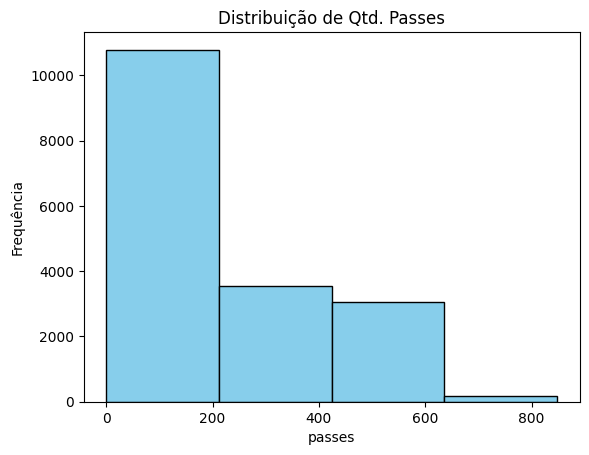

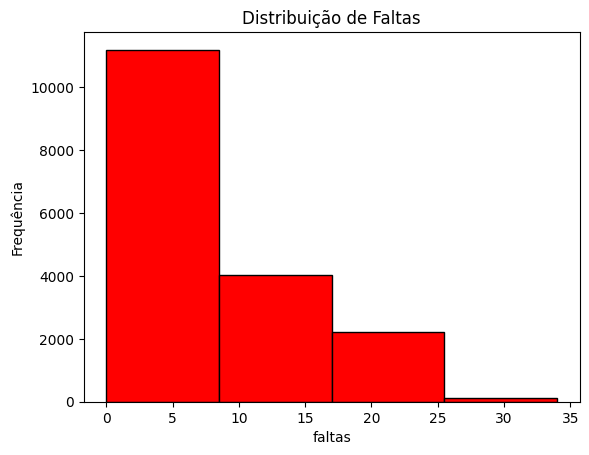

In [76]:
# Podemos analisar o histograma de alguns atributos
# Quantidade de Passes
plt.hist(df['passes'], bins=4, color='skyblue', edgecolor='black')
plt.title('Distribuição de Qtd. Passes')
plt.xlabel('passes')
plt.ylabel('Frequência')
plt.show()

# Faltas
plt.hist(df['faltas'], bins=4, color='red', edgecolor='black')
plt.title('Distribuição de Faltas')
plt.xlabel('faltas')
plt.ylabel('Frequência')
plt.show()

Nota-se que a distribuição do dataset original, se concentra bastante nos valores vazios, como identificado nas análises anteriores, além da presença, com pouca frequência, de possíveis outliers.

Além do destaque que se dá à semelhança extrema das frequências nos mesmos intervalos.

# **VISUALIZAÇÃO DE DADOS E PRÉ PROCESSAMENTO**

A visualização de dados é utilizada tanto para exibição da distribuição dos dados como auxílio para tratamento dos dados. A visualização e o pré-processamento podem ser usadas numa mesma tarefa. No pré-processamento, a limpeza começa dos dados eliminando os valores vazios, colunas desnecessárias e analisando possíveis outliers. Mas antes o dataset original será armazenado numa variável antes de começar o tratamento.

In [77]:
# Salvando o dataset original
dfOriginal = df

# Eliminando os valores vazios
dfNovo = df.dropna()

# Eliminando colunas desnecessárias. O motivo da retirada é que eles são irrelevantes para a análise com base na hipótese.
dfNovo = dfNovo.drop('cartao_amarelo', axis = 1)
dfNovo = dfNovo.drop('impedimentos', axis = 1)
dfNovo = dfNovo.drop('chutes_no_alvo', axis = 1)
dfNovo = dfNovo.drop('precisao_passes', axis = 1)
dfNovo = dfNovo.drop('escanteios', axis = 1)
dfNovo = dfNovo.drop('cartao_vermelho', axis = 1)

# Transformando a coluna de posse de bola em numérico para poder obter dados descritivos do atributo.
dfNovo['posse_de_bola'] = dfNovo['posse_de_bola'].str.extract('(\d+)').astype(int)

# Exibindo com a retirada dos registros com os valores vazios
dfNovo

,partida_id,rodata,clube,chutes,posse_de_bola,passes,faltas
12250,6126,1,Gremio,6,60,649,15
12251,6126,1,Cruzeiro,12,40,425,20
12252,6127,1,Vitoria,21,66,545,24
12253,6127,1,Flamengo,10,34,286,10
12254,6128,1,Ceara,10,46,472,5
...,...,...,...,...,...,...,...
16805,8403,38,Fortaleza,14,45,295,9
16806,8404,38,Flamengo,10,58,535,16
16807,8404,38,Sao Paulo,9,42,406,13
16808,8405,38,Bragantino,9,55,398,14


In [78]:
# Verificando se ainda existem dados nulos
dfNovo.isnull().sum()

,0
partida_id,0
rodata,0
clube,0
chutes,0
posse_de_bola,0
passes,0
faltas,0


Conclui-se que o dataset está praticamente normalizado, apenas com dados relevantes, melhorando a eficiência da análise.

In [79]:
# Tamanho do dataset tratado (4512 instâncias e 7 colunas)
dfNovo.shape

(4512, 7)

In [80]:
# Descritivo do novo dataset
dfNovo.describe()

,partida_id,rodata,chutes,posse_de_bola,passes,faltas
count,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000
mean,7271.160904,19.476950,13.103059,50.000000,424.615248,14.770833
std,659.332831,10.974443,5.131459,11.012317,102.684251,4.335340
min,6126.000000,1.000000,1.000000,20.000000,170.000000,2.000000
25%,6698.750000,10.000000,9.000000,42.000000,350.000000,12.000000
50%,7277.500000,19.000000,13.000000,50.000000,419.000000,15.000000
75%,7841.250000,29.000000,16.000000,58.000000,493.000000,18.000000
max,8405.000000,38.000000,37.000000,80.000000,848.000000,31.000000


Com isso, podemos notar que houve uma mudança significativa na distribuição dos dados, fazendo com que os dados façam um pouco mais de sentido e o desvio padrão varie corretamente de acordo com a média.

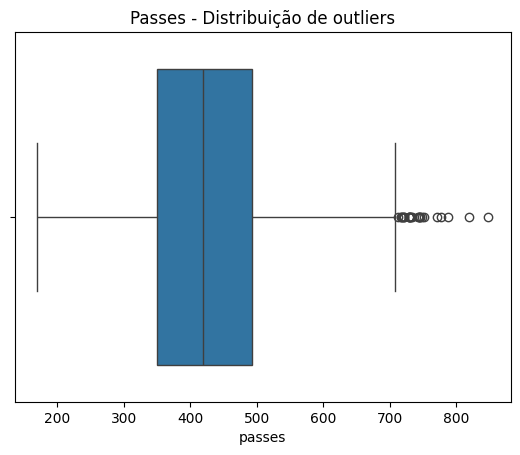

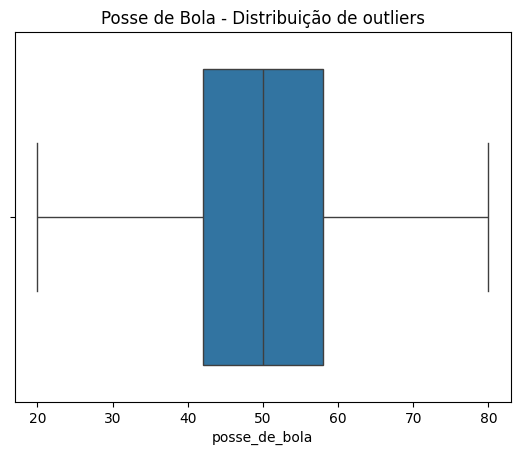

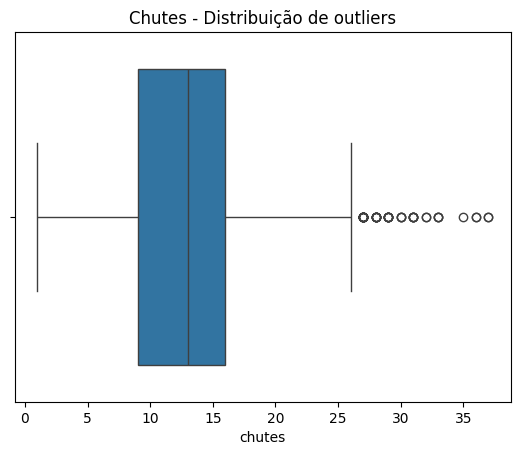

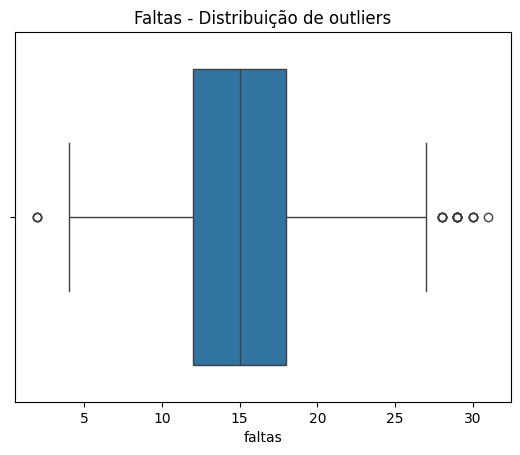

In [81]:
# Analisando, visualmente, a distribuição de outliers em relação à quantidade de passes.
sns.boxplot(data=dfNovo, x='passes')
plt.title("Passes - Distribuição de outliers")
plt.show()

# Mostrando os outliers dos atributos restantes
# Posse de bola
sns.boxplot(data=dfNovo, x='posse_de_bola')
plt.title("Posse de Bola - Distribuição de outliers")
plt.show()

# Chutes

sns.boxplot(data=dfNovo, x='chutes')
plt.title("Chutes - Distribuição de outliers")
plt.show()

# Faltas

sns.boxplot(data=dfNovo, x='faltas')
plt.title("Faltas - Distribuição de outliers")
plt.show()

Apenas a posse de bola não possui outliers. Em relação às faltas, no tratamento, o parâmetro de faltas será alterado, por acreditar que em uma partida de futebol, o time possa cometer pouquíssimas faltas, diferente da quantidade alta, que pelo mesmo contexto, há um lógica melhor em tratar os outliers superiores.

A remoção dos outliers será feito utilizado o IQR. Eliminando distorções por completo.

O IQR consiste em calcular o primeiro e o último quartil estabelecendo limites em cada um deles. Após isso, os valores que se encontrarem abaixo ou acima do limite são desconsiderados.

Cabe à análise entender se faz sentido manter os limites ou não.

In [82]:
# Calcular IQR
# Removendo outliers dos passes
Q1_p = dfNovo['passes'].quantile(0.25)
Q3_p = dfNovo['passes'].quantile(0.75)
IQR_p = Q3_p - Q1_p

# Limites inferior e superior
limite_inferior = Q1_p - 1.5 * IQR_p
limite_superior = Q3_p + 1.5 * IQR_p

df_sem_outliers_passe = dfNovo[
    (dfNovo['passes'] >= limite_inferior) &
    (dfNovo['passes'] <= limite_superior)
]

print(f"Limite inferior dos passes: {limite_inferior}")
print(f"Limite superior dos passes: {limite_superior}")

print("")

# Removendo outliers das finalizações
Q1_fin = df_sem_outliers_passe['chutes'].quantile(0.25)
Q3_fin = df_sem_outliers_passe['chutes'].quantile(0.75)
IQR_fin = Q3_fin - Q1_fin

# Limites inferior e superior
limite_inferior_fn = Q1_fin - 1.5 * IQR_fin
limite_superior_fn = Q3_fin + 1.5 * IQR_fin

df_sem_outliers_2 = df_sem_outliers_passe[
    (df_sem_outliers_passe['chutes'] >= limite_inferior_fn) &
    (df_sem_outliers_passe['chutes'] <= limite_superior_fn)
]

print(f"Limite inferior das finalizações: {limite_inferior_fn}")
print(f"Limite superior das finalizações: {limite_superior_fn}")

print("")

# Removendo outliers das faltas
Q1_faltas = dfNovo['faltas'].quantile(0.25)
Q3_faltas = dfNovo['faltas'].quantile(0.75)
IQR_faltas = Q3_faltas - Q1_faltas

# Limite superior
limite_superior_f = Q3_faltas + 1.5 * IQR_faltas

df_sem_outliers_3 = df_sem_outliers_2[
    (df_sem_outliers_2['faltas'] <= limite_superior_f)
]

print(f"Limite superior das faltas: {limite_superior_f}")

Limite inferior dos passes: 135.5
Limite superior dos passes: 707.5

Limite inferior das finalizações: -1.5
Limite superior das finalizações: 26.5

Limite superior das faltas: 27.0


Ao analisar os limites calculados, conclui-se que apenas o limite superior, em relação ao limite de faltas, será levado em conta. Para um jogo, um número mínimo de faltas faz mais sentido que um número exagerado de faltas, pois dentro do contexto, um time não faria uma grande quantidade de faltas por consequência de ter vários de seus jogadores expulsos.

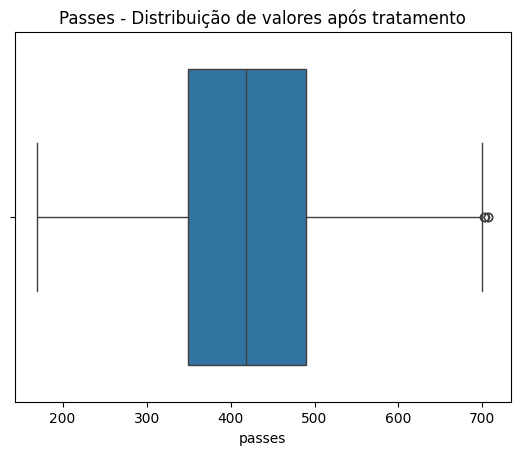

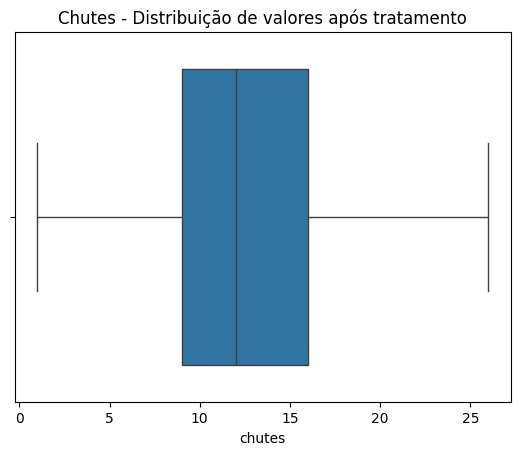

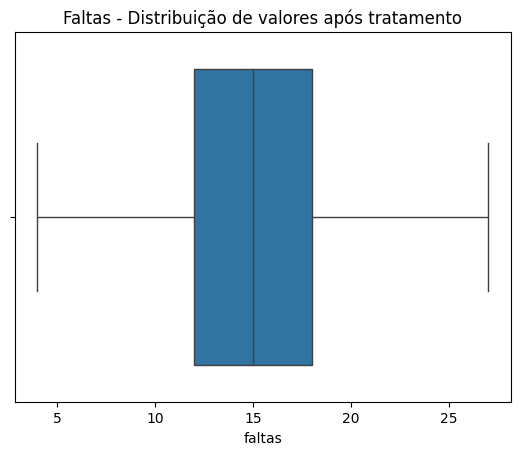

In [83]:
# Verificando a distribuição dos valores
# Passes
sns.boxplot(data=df_sem_outliers_3, x='passes')
plt.title("Passes - Distribuição de valores após tratamento")
plt.show()

# Verificando a distribuição dos valores
# Finalizações
sns.boxplot(data=df_sem_outliers_3, x='chutes')
plt.title("Chutes - Distribuição de valores após tratamento")
plt.show()

# Faltas
sns.boxplot(data=df_sem_outliers_3, x='faltas')
plt.title("Faltas - Distribuição de valores após tratamento")
plt.show()


Com a eliminação dos outliers, é possível seguir para a próxima etapa do pré-processamento, escolhendo um algoritmo que se encaixe no contexto analisado.

Neste problema de **aprendizado não supervisionado**, onde o algoritmo não tem uma saída para analisar os dados, utiliza-se o algoritmo de **normalização**. Através dela, permite dar aos atributos pesos iguais, independente da quantidade ou do tipo de dado de cada um, já que, dependendo do atributo, os valores podem variar bastante, como quantidade de passes e finalizações, por exemplo.

In [84]:
# Aplicando normalização nos atributos

# A função normaliza os dados dos atributos entre 0 e 1
scaler = MinMaxScaler()
valores_normalizados = scaler.fit_transform(
    df_sem_outliers_3[['passes', 'posse_de_bola', 'chutes', 'faltas']]
)

# A função faz os valores normalizados entrarem nas últimas colunas do dataset
df_sem_outliers_3.loc[:, ['passes_norm', 'posse_norm', 'finalizacoes_norm', 'faltas_norm']] = valores_normalizados

# Atribundo a variável do dataframe final
df_final = df_sem_outliers_3

# Mostrando a versão final do dataset
df_final.describe()

,partida_id,rodata,chutes,posse_de_bola,passes,faltas,passes_norm,posse_norm,finalizacoes_norm,faltas_norm
count,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000
mean,7270.358162,19.490831,12.897894,49.743265,422.006113,14.762282,0.469285,0.504123,0.475916,0.467925
std,659.082830,10.971635,4.834136,10.841129,99.701526,4.235386,0.185664,0.183748,0.193365,0.184147
min,6126.000000,1.000000,1.000000,20.000000,170.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,6698.000000,10.000000,9.000000,42.000000,349.000000,12.000000,0.333333,0.372881,0.320000,0.347826
50%,7277.000000,20.000000,12.000000,49.000000,418.000000,15.000000,0.461825,0.491525,0.440000,0.478261
75%,7840.000000,29.000000,16.000000,58.000000,490.000000,18.000000,0.595903,0.644068,0.600000,0.608696
max,8405.000000,38.000000,26.000000,79.000000,707.000000,27.000000,1.000000,1.000000,1.000000,1.000000


Observa-se que independente do tipo do valor, seja ele um número pequeno ou não, os valores normalizados estabelece escalas bem definidas e atribuindo o mesmo peso para todos, dando mais equilíbrio ao analisar as hipóteses levantadas.

A partir das hipóteses levantadas, podemos responder através da ***correlação*** se a hipótese é verdadeira ou não.

***Primeira hipótese: "Quem possui menor posse, comete mais faltas."***

In [85]:
# Primeira hipótese
corr_posse_falta = df_final[['posse_norm', 'faltas_norm']].corr()

print(corr_posse_falta)

             posse_norm  faltas_norm
posse_norm      1.00000     -0.09705
faltas_norm    -0.09705      1.00000


Ao analisarmos a correlação, pode-se concluir que a relação entre a posse de bola e as faltas são inversos, ou seja, o time que possui menos a bola tende a fazer mais faltas, ou também pode-se dizer que quem faz mais faltas tem pouca posse de bola. Quanto menor o número, variando de -1 a 1, menos correlação possui. **Assim, a hipótese se prova verdadeira.**

***Segunda hipótese: "Os times com maior posse de bola tendem a trocar mais passes."***

In [86]:
# Segunda hipótese
corr_posse_passe = df_final[['posse_norm', 'passes_norm']].corr()

print(corr_posse_passe)

             posse_norm  passes_norm
posse_norm     1.000000     0.883224
passes_norm    0.883224     1.000000


Nesta correlação acontece o contrário da primeira hipótese. Pode-se dizer que há uma correlação forte e que o time com mais posse de bola ao longo dos jogos tende a trocar mais passes, **provando a segunda hipótese também como verdadeira.**

***Terceira hipótese: "Quem finaliza mais, geralmente, possui maior posse de bola"***

In [87]:
# Terceira hipótese

corr_posse_fin = df_final[['posse_norm', 'finalizacoes_norm']].corr()

print(corr_posse_fin)

                   posse_norm  finalizacoes_norm
posse_norm           1.000000           0.407175
finalizacoes_norm    0.407175           1.000000


Já a terceira hipótese possui uma correlação fraca (variando entre 0.3 e 0.4), o que dificulta na comprovação de uma hipótese como essa. **Portanto, a terceira hipótese não consegue ser provada, portanto é inconclusiva.**

A partir destas análises de correlação, podemos analisar o perfil dos clubes baseado na média normalizada dos atributos, o que dará uma visão melhor do perfil de alguns clubes. Para análise de perfil, buscamos a média da normalização em cada atributo para podermos analisar seus pontos fortes e fracos.

In [88]:
# Usa a média da normalização para analisar o perfil de cada time

perfil_times = df_final.groupby('clube')[
    ['passes_norm', 'posse_norm', 'finalizacoes_norm', 'faltas_norm']
].mean()

print(perfil_times)

               passes_norm  posse_norm  finalizacoes_norm  faltas_norm
clube                                                                 
America-MG        0.393424    0.429985           0.488859     0.473884
Athletico-PR      0.477064    0.510656           0.484554     0.494404
Atletico-GO       0.430267    0.487288           0.438214     0.440217
Atletico-MG       0.586951    0.598393           0.539343     0.473158
Avai              0.443382    0.479916           0.428493     0.463967
Bahia             0.426653    0.468015           0.488387     0.497896
Botafogo-RJ       0.439066    0.476958           0.473514     0.426322
Bragantino        0.467512    0.532753           0.540270     0.496181
CSA               0.321202    0.331719           0.408000     0.491925
Ceara             0.380312    0.439243           0.478730     0.478951
Chapecoense       0.342528    0.410563           0.432143     0.502329
Corinthians       0.565504    0.547794           0.424144     0.394046
Coriti

Com as médias normalizadas de cada atributo calculadas, podemos encontrar os times com a maior média de cada atributo,

In [89]:
# Agrupando os times com maior destaque em cada atributo
# Cálculo por média normalizada

# Obtendo os times com maior média normalizada de cada atributo, equilibrando os pesos
max_passe = df_final.groupby('clube')['passes_norm'].mean().nlargest(1)
max_fin = df_final.groupby('clube')['finalizacoes_norm'].mean().nlargest(1)
max_posse = df_final.groupby('clube')['posse_norm'].mean().nlargest(1)
max_faltas = df_final.groupby('clube')['faltas_norm'].mean().nlargest(1)

# Média dos atributos por time para exibição
media_passe = df_final.groupby('clube')['passes'].mean().nlargest(1)
media_fin = df_final.groupby('clube')['chutes'].mean().nlargest(1)
media_posse = df_final.groupby('clube')['posse_de_bola'].mean().nlargest(1)
media_faltas = df_final.groupby('clube')['faltas'].mean().nlargest(1)

# Formatar a saída
print("═" * 50)
print(" ESTATÍSTICAS PRINCIPAIS ".center(50, '═'))
print("═" * 50)
print(f"• Clube com melhor média de passes: {max_passe.index[0]} ({media_passe.values[0]:.1f} passes)")
print(f"• Clube com mais finalizações: {max_fin.index[0]} ({media_fin.values[0]:.1f} finalizações)")
print(f"• Clube com maior posse de bola: {max_posse.index[0]} ({media_posse.values[0]:.1f}%)")
print(f"• Clube com mais faltas: {max_faltas.index[0]} ({media_faltas.values[0]:.1f} faltas)")
print("═" * 50)


══════════════════════════════════════════════════
════════════ ESTATÍSTICAS PRINCIPAIS ═════════════
══════════════════════════════════════════════════
• Clube com melhor média de passes: Flamengo (504.8 passes)
• Clube com mais finalizações: Palmeiras (14.6 finalizações)
• Clube com maior posse de bola: Flamengo (58.4%)
• Clube com mais faltas: Vitoria (17.3 faltas)
══════════════════════════════════════════════════


Há uma predominância do time do Flamengo em dois dos quatro atributos, passes e posse de bola. O que ajuda a endossar a segunda hipótese. O Flamengo reforça a correlação e a ideia trazida por ela.

O Palmeiras é o time que mais finaliza e o Vitoria é o time que mais comete faltas.

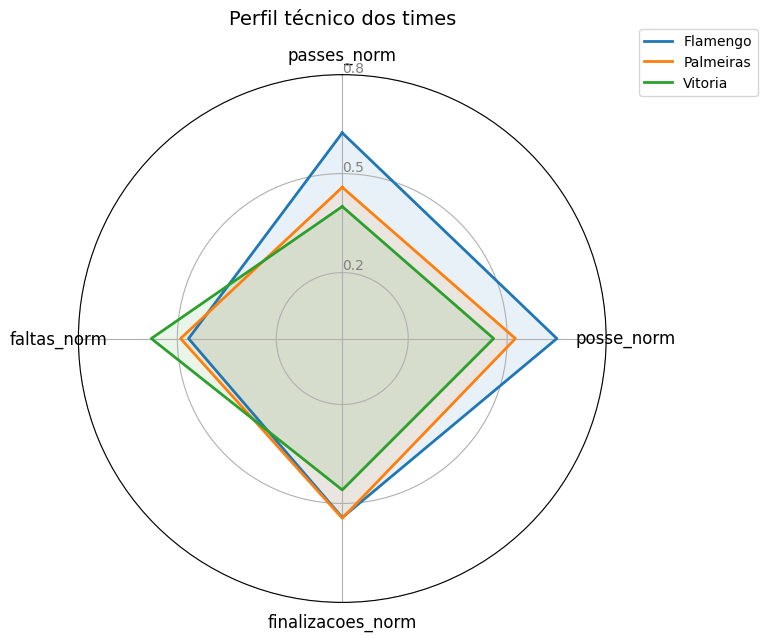

In [90]:
# Analisando os perfis completos dos times

# Nomes dos atributos
labels = perfil_times.columns.tolist()
num_vars = len(labels)

# Ângulos do círculo
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # fechar o gráfico

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Índices que estão em uma lista específica
indices_desejados = ['Flamengo', 'Palmeiras', 'Vitoria'] # Os maiores de cada atributo
filtrado = perfil_times[perfil_times.index.isin(indices_desejados)]

# Usando query (para índices que estão em uma coluna)
filtrado = perfil_times.query("index in @indices_desejados")

# Plotar para cada time
for time in filtrado.index:
    valores = filtrado.loc[time].tolist()
    valores += valores[:1]  # fechar o gráfico
    ax.plot(angles, valores, label=time, linewidth=2)
    ax.fill(angles, valores, alpha=0.1)

# Ajustes visuais
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], labels, fontsize=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.5, 0.8], ["0.2", "0.5", "0.8"], color="gray", size=10)
plt.title('Perfil técnico dos times', size=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


Com esta análise, também pode-se traçar um perfil, através dos atributos, do perfil dos times do Flamengo, Palmeiras e Vitoria. Estes times foram escolhidos por terem as melhores médias por atributo e para ilustrar visualmente como uma análise de perfil pode ser realizada.

O time do Flamengo se caracteriza pela alta taxa de posse de bola, finalizações e passes. Em contraste a isso, o time faz poucas faltas, o que significa que durante o jogo, o Flamengo prefere um jogo de mais controle da posse de bola para poder trocar mais passes e ter mais volume do que o adversário.

O Palmeiras embora troque poucos passes, comparado ao Flamengo, finaliza tanto quanto ele. O que pode caracterizar um forma de jogo que preze mais pelo jogo taticamente ofensivo, com muitas finalizações, embora não fique tanto com a bola, indicando que também precisa se defender bem, já que não tem tanto o controle da bola para poder ditar o ritmo de jogo, indicando um jogo reativo.

O Vitoria reflete a primeira hipótese. É o time mais fraco em todos os atributos, exceto em faltas, que inclusive se destacam bastante em relação aos outros times. Pode-se indicar que é um time que sofre bastante defensivamente em seus jogos, já que não possui a bola e comete bastantes faltas, classificando-o seu jogo como indisciplinado, além de deixar muito espaço pro adversário jogar, o que pode explicar a quantidade de faltas que comete.


# **CONCLUSÃO**

As etapas de análise e pré-processamento foram essenciais para que o dado presente no dataset pudesse ser entendido de uma forma mais adequada. As anomalias e quantidade de valores vazios mostraram como o dataset estava distribuído. Isso ajuda bastante a limpar o dado e o deixando mais adequado para análise. A visualização dos dados, tanto para entender a distribuição do dado quanto pra entender a quantidade de outliers no dataset, foi crucial para analisar mais claramente a forma de tratamento que mais se encaixava, de acordo com o atributo.

Com essa estruturação do papel de cada forma de análise e tratamento, o trabalho foi facilitado, pois após essas etapas não é necessário se preocupar com valores estranhos, já que as técnicas, aplicadas de acordo com as hipóteses, auxiliaram a entender e resolver o problema.

A etapa de normalização dos dados foi extremamente importante para poder dar o equiíbrio que o dataset precisava, já que trabalha com vários tipos de dados diferentes dentro de cada atributo.

Das hipóteses levantadas, duas foram validadas da seguinte forma e a outra foi dada como inclusiva:

Através da correlação foi possível responder todas as hipóteses, sendo a **primeira** e a **segunda hipótese** validadas com sucesso. A **terceira hipótese**, devido à correlação fraca, foi possível dizer que a afirmação é inconclusiva.